# 1. Numerical integration

**Pin number**: 132

**Question 1.** 

Lowest order error term for the Trapezium rule is: -1/12 * f''(x_0) * dx**3

Order of error for the $N$-increment case is: dx**2

**Question 2.**

Lowest order error term for the Midpoint rule is: 1/24 * f''(x_0) * dx**3

Order of error for the $N$-increment case is: dx**2

The following code imports two Python modules: <b><span style="color: blue;">math</span></b> which provides access to the mathematical functions, and <b><span style="color: blue;">matplotlib.pyplot</span></b> which is a collection of functions for creating figures and plotting.

In [2]:
# Execute this cell to import math and matplotlib.pyplot modules

import math
import matplotlib.pyplot as plt

In the following cell, we define parameters:

In [3]:
# Execute this cell to assign values to variables

PIN =   132
k = 3.0 - PIN/50
a = 2.0
b = 5.0
N = 256
Delta_x = (b-a)/N

%whos

Variable   Type      Data/Info
------------------------------
Delta_x    float     0.01171875
N          int       256
PIN        int       132
a          float     2.0
b          float     5.0
k          float     0.3599999999999999
math       module    <module 'math' from '/Lib<...>h.cpython-313-darwin.so'>
np         module    Shape: <function shape at 0x10f956480>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


Now define the function $f(x)$:

In [4]:
# Execute this cell to define the function f(x)
def f(x):
    return (x**3+(3+k)*x**2)*math.log(x)

In [5]:
# You can use this cell to test whether your function f(x) is defined correctly.
# Try, e.g., calling the function value f(5.0) etc.
f(0.5)

-0.6688870292403472

In the following cell, we calculate the true value of the integral of $f$ over the interval $[a,b]$:

In [6]:
# Execute this cell to calculate the exact value of the integral of f(x) over [a,b]

int_f=(b**4/4+(3+k)/3*b**3)*math.log(b)-b**4/16-(3+k)/9*b**3-((a**4/4+(3+k)/3*a**3)*math.log(a)-a**4/16-(3+k)/9*a**3)
print(int_f)

386.0702940985453


Now, let us define a vector $x_{values}$ to store the values of $x_i$ and the vector $f_{values}$ to store the values of $f(x_i)$

In [7]:
# Execute this cell to define x_0, x_1,... x_N and calculate f(x_0), f(x_1),..., f(x_N)

x_values = []
f_values = []
for i in range(0,N+1):
    x_values+=[a+i*Delta_x]
    f_values+=[f(x_values[i])]

The values $x_i$ and $f(x_i)$ can be tabulated by executing the following cell:

In [8]:
# Execute this cell to produce a table with values of x_i and f(x_i)

from tabulate import tabulate
tab=[]
for i in range(0,N+1,20):
    tab+=[[i,x_values[i],f_values[i]]]

#define header names
col_names = ["i","x_i", "f(x_i)"]
  
#display table
print(tabulate(tab, headers=col_names))

  i      x_i    f(x_i)
---  -------  --------
  0  2         14.8611
 20  2.23438   22.4543
 40  2.46875   32.104
 60  2.70312   44.0548
 80  2.9375    58.5551
100  3.17188   75.8573
120  3.40625   96.2175
140  3.64062  119.896
160  3.875    147.155
180  4.10938  178.263
200  4.34375  213.489
220  4.57812  253.108
240  4.8125   297.394


Alternatively, the function $f(x)$ can also be plotted graphically.

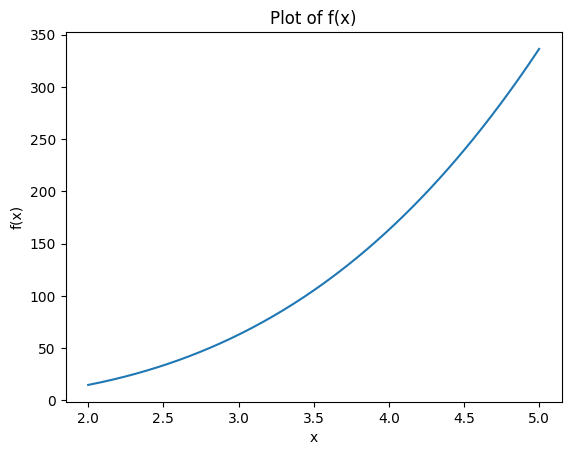

In [9]:
# Use this cell for plotting f(x) in the interval [a,b]

fig_plot_f = plt.figure()

# plotting the points  
plt.plot(x_values, f_values) 
    
# naming the x axis 
plt.xlabel('x') 
# naming the y axis 
plt.ylabel('f(x)') 
    
# giving a title to the graph 
plt.title('Plot of f(x)') 
    
# function to show the plot 
plt.show()

**Question 3.** Integrate numerically $f(x)$ over the interval $[a,b]$ by means of the Constant rule (lower and upper case), Trapezium rule, Midpoint rule and Simpson's rule and print your results.

In [10]:
constant_rule_lower = 0
for i in range (0,N):
    constant_rule_lower = constant_rule_lower + f_values[i]*Delta_x

constant_rule_upper = 0
for i in range (1,N+1):
    constant_rule_upper = constant_rule_upper + f_values[i]*Delta_x

# Include here the code for the numerical integration by means of the Trapezium, Midpoint and Simpson's rule

print('Constant rule lower:',constant_rule_lower)
print('Constant rule upper:',constant_rule_upper)

# Print here the results of the numerical integration by means of the Trapezium, Midpoint and Simpson's rule

#trapezium rule
trapezium_rule = 0
for i in range(0,N):
    trapezium_rule+=(f_values[i]+f_values[i+1])*Delta_x/2
print('Trapezium rule:',trapezium_rule)

#midpoint rule
midpoint_rule = 0
for i in range(0,N):
    midpoint_rule+=f(a+(i+1/2)* Delta_x)*Delta_x
print('Midpoint rule:',midpoint_rule)

#simpson's rule
#i think this code works for both even and odd N, if odd, it splits last interval in two and applies simpson rule there.
simpson_rule = 0
N_parity='empty'
if N%2==0:
    lim = N/2
    N_parity='even'
else:
    lim=(N-1)/2
    N_parity='odd'

for i in range(0, int(lim)):
    simpson_rule+=(f_values[2*i]+4*f_values[2*i+1]+f_values[2*i+2])*Delta_x/3
if N_parity=='odd':
    simpson_rule+= (f_values[(N-2)]+4*f(a+(N-2+Delta_x/2))+f_values[N-1])

print("Simpson's rule:",simpson_rule)

Constant rule lower: 384.1885920931611
Constant rule upper: 387.9563043761399
Trapezium rule: 386.0724482346504
Midpoint rule: 386.06921703052706
Simpson's rule: 386.07029409891


**Question 4.**  Write the functions constant_rule_lower(N), constant_rule_upper(N), trapezium_rule(N), midpoint_rule(N), simpsons_rule(N) that return the value of the numerical integral by means of the different numerical integration schemes.

In [11]:
# Use this cell to define functions that approximate the integral by means of different numerical integration schemes 
# for varying values of N

def constant_rule_lower(N):
    constant_rule_lower = 0
    for i in range (0,N):
        constant_rule_lower = constant_rule_lower + f(a+i*(b-a)/N)*(b-a)/N
    return(constant_rule_lower)

# Update this computation cell by writing the Python code for four remaining functions

def constant_rule_upper(N):
    Delta_x = (b-a)/N
    constant_rule_upper = 0
    for i in range (1,N+1):
        constant_rule_upper = constant_rule_upper + f(a+i*Delta_x)*Delta_x
    return(constant_rule_upper)

def trapezium_rule(N):
    Delta_x = (b-a)/N
    trapezium_rule = 0
    for i in range(0,N):
        trapezium_rule+=(f(a+i*Delta_x)+f(a+(i+1)*Delta_x))*Delta_x/2
    return(trapezium_rule)

def midpoint_rule(N):
    Delta_x = (b-a)/N
    midpoint_rule = 0
    for i in range(0,N):
        midpoint_rule+=f(a+(i+1/2)* Delta_x)*Delta_x
    return(midpoint_rule)

def simpson_rule(N):
    Delta_x = (b-a)/N
    simpson_rule = 0
   
    if N%2==0:
        lim = N/2
        N_parity='even'
    else:
        lim=(N-1)/2

        N_parity='odd'

    for i in range(0, int(lim)):
        simpson_rule+=(f(a+2*i*Delta_x)+4*f(a+(2*i+1)*Delta_x)+f(a+(2*i+2)*Delta_x))*Delta_x/3
    if N_parity=='odd':
        
       raise ValueError("Simpson's rule requires an even number of intervals N.")

    return(simpson_rule)

simpson_rule(50)
trapezium_rule(50)
midpoint_rule(50)
constant_rule_lower(50)
constant_rule_upper(50)


395.7721068682041

**Question 5.** For each of the five integration rules (lower and upper Constant rules, Trapezium rule, Midpoint rule and Simpson's rule), calculate the following lists for $N=16, 32, 64, 128, 256 $ :

  1. the values of the numerical integrals
  2. the absolute values of errors between the numerical integrals and the exact integral value
  3. the natural logarithm of these absolute errors

In [12]:
# Use this cell to create and calculate lists storing values of numerical integrals, absolute values of errors as well as their 
# natural logarithms for different numerical integration rules and different values of N

data_N = [16, 32, 64, 128, 256]
ln_data_N = [math.log(ele) for ele in data_N]

constant_rule_lower_N=[constant_rule_lower(ele) for ele in data_N]
error_constant_rule_lower_N = [abs(ele - int_f) for ele in constant_rule_lower_N]
ln_error_constant_rule_lower_N = [math.log(ele) for ele in error_constant_rule_lower_N]

# Create and calculate here lists as instructed for remaining integration rules 
# (upper Constant rule, Trapezium rule, Midpoint rule and Simpson's rule)

constant_rule_upper_N=[constant_rule_upper(ele) for ele in data_N]
error_constant_rule_upper_N = [abs(ele - int_f) for ele in constant_rule_upper_N]
ln_error_constant_rule_upper_N = [math.log(ele) for ele in error_constant_rule_upper_N]

trapezium_rule_N=[trapezium_rule(ele) for ele in data_N]
error_trapezium_rule_N = [abs(ele - int_f) for ele in trapezium_rule_N]
ln_error_trapezium_rule_N = [math.log(ele) for ele in error_trapezium_rule_N]

midpoint_rule_N=[midpoint_rule(ele) for ele in data_N]
error_midpoint_rule_N = [abs(ele - int_f) for ele in midpoint_rule_N]
ln_error_midpoint_rule_N = [math.log(ele) for ele in error_midpoint_rule_N]

simpson_rule_N=[simpson_rule(ele) for ele in data_N]
error_simpson_rule_N = [abs(ele - int_f) for ele in simpson_rule_N]
ln_error_simpson_rule_N = [math.log(ele) for ele in error_simpson_rule_N]



**Question 6.** Create a table with seven columns showing $N$, $\ln(N)$ and $\ln|error|$ (natural logarithms of the absolute values of errors between the numerical values of the integral and the exact integral value) for five integration rules.

In [13]:
# Use this cell to tabulate the logarithm of errors for different numerical integration rules and values of N


errors = []
counter = 0
for i in data_N:
   errors+=[[i,ln_data_N[counter], ln_error_constant_rule_lower_N[counter], ln_error_constant_rule_upper_N[counter], ln_error_trapezium_rule_N[counter], ln_error_midpoint_rule_N[counter], ln_error_simpson_rule_N[counter]]]
   counter+=1
col_names= ["N","ln(N)", "ln(Error Constant Rule Lower)", "ln(Error Constant Rule Upper)", "ln(Error Trapezium Rule)", "ln(Error Midpoint Rule)", "ln(Error Simpson's Rule)"]
print(tabulate(errors, headers=col_names))

  N    ln(N)    ln(Error Constant Rule Lower)    ln(Error Constant Rule Upper)    ln(Error Trapezium Rule)    ln(Error Midpoint Rule)    ln(Error Simpson's Rule)
---  -------  -------------------------------  -------------------------------  --------------------------  -------------------------  --------------------------
 16  2.77259                         3.38744                          3.42404                    -0.595199                   -1.28835                    -10.641
 32  3.46574                         2.70357                          2.72187                    -1.98149                    -2.67463                    -13.4138
 64  4.15888                         2.01503                          2.02418                    -3.36778                    -4.06093                    -16.1865
128  4.85203                         1.32418                          1.32875                    -4.75407                    -5.44722                    -18.9591
256  5.54518                 

**Question 7.** Write the Python code to determine linear fit polynomials of $\ln|error|$ against $\ln(N)$ for five integration rules (lower and upper Constant rules, Trapezium rule, Midpoint rule and Simpson's rule).

In [14]:
# Use this cell to write a code for finding linear fits of ln(|error|) against ln(N)

import numpy as np

coef_constant_rule_lower = np.polyfit(ln_data_N,ln_error_constant_rule_lower_N,1)
fit_constant_rule_lower = np.poly1d(coef_constant_rule_lower)
print('The fit function for the constant rule lower is:', coef_constant_rule_lower[0],'*x +',coef_constant_rule_lower[1])

# Write here the Python code to determine linear fit polynomials of ln|error| against ln(N)
# for the remaining four integration rules (upper Constant rule, Trapezium rule, Midpoint rule and Simpson's rule)

coef_constant_rule_upper = np.polyfit(ln_data_N,ln_error_constant_rule_upper_N,1)
fit_constant_rule_upper = np.poly1d(coef_constant_rule_upper)
print('The fit function for the constant rule upper is:', coef_constant_rule_upper[0],'*x +',coef_constant_rule_upper[1])

coef_trapezium_rule = np.polyfit(ln_data_N,ln_error_trapezium_rule_N,1)
fit_trapezium_rule = np.poly1d(coef_trapezium_rule)
print('The fit function for the trapezium rule is:', coef_trapezium_rule[0],'*x +',coef_trapezium_rule[1])

coef_midpoint_rule = np.polyfit(ln_data_N,ln_error_midpoint_rule_N,1)
fit_midpoint_rule = np.poly1d(coef_midpoint_rule)
print('The fit function for the midpoint rule lower is:', coef_midpoint_rule[0],'*x +',coef_midpoint_rule[1])

coef_simpson_rule = np.polyfit(ln_data_N,ln_error_simpson_rule_N,1)
fit_simpson_rule = np.poly1d(coef_simpson_rule)
print('The fit function for the simpson rule lower is:', coef_simpson_rule[0],'*x +',coef_simpson_rule[1])



The fit function for the constant rule lower is: -0.9940068154535104 *x + 6.146438768078626
The fit function for the constant rule upper is: -1.005885647315587 *x + 6.210021332762924
The fit function for the trapezium rule is: -1.999996518248852 *x + 4.949972048466766
The fit function for the midpoint rule lower is: -1.9999939069021568 *x + 4.25681184188759
The fit function for the simpson rule lower is: -4.000185036815209 *x + 0.44984725910008844


**Question 8.** Produce a figure showing the following:
1. scatter plots of $\ln|error|$ against $\ln(N)$
2. plots of linear fit polynomials
3. legend for the linear fit polynomials
4. appropriate axis labels and plot title
   
for all five numerical integration rules.

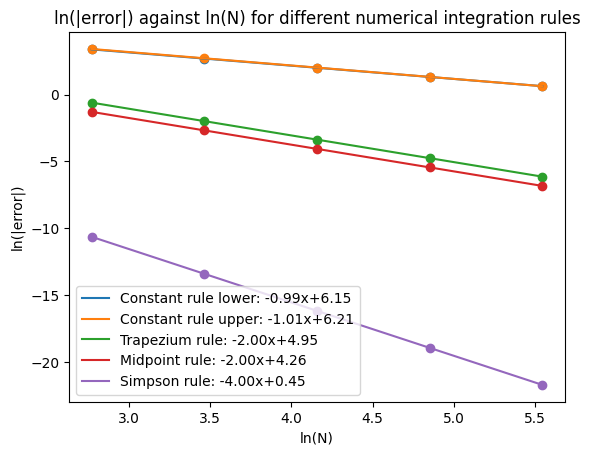

In [15]:
# Use this cell to generate a figure showing scatter plots of ln(|error|) against ln(N) for five numerical integration rules
# as well as plots of the corresponsding linear fits

plt.title('ln(|error|) against ln(N) for different numerical integration rules')
plt.ylabel('ln(|error|)')
plt.xlabel('ln(N)') 
plt.scatter(ln_data_N, ln_error_constant_rule_lower_N)
plt.plot(ln_data_N,fit_constant_rule_lower(ln_data_N),label=f'Constant rule lower: {coef_constant_rule_lower[0]:.2f}x+{coef_constant_rule_lower[1]:.2f}')

# Complete here the Python code to include the plots for the remaining four numerical integration rules as well as
# axis labels and plot title

plt.scatter(ln_data_N, ln_error_constant_rule_upper_N)
plt.plot(ln_data_N,fit_constant_rule_upper(ln_data_N),label=f'Constant rule upper: {coef_constant_rule_upper[0]:.2f}x+{coef_constant_rule_upper[1]:.2f}')

plt.scatter(ln_data_N, ln_error_trapezium_rule_N)
plt.plot(ln_data_N,fit_trapezium_rule(ln_data_N),label=f'Trapezium rule: {coef_trapezium_rule[0]:.2f}x+{coef_trapezium_rule[1]:.2f}')

plt.scatter(ln_data_N, ln_error_midpoint_rule_N)
plt.plot(ln_data_N,fit_midpoint_rule(ln_data_N),label=f'Midpoint rule: {coef_midpoint_rule[0]:.2f}x+{coef_midpoint_rule[1]:.2f}')

plt.scatter(ln_data_N, ln_error_simpson_rule_N)
plt.plot(ln_data_N,fit_simpson_rule(ln_data_N),label=f'Simpson rule: {coef_simpson_rule[0]:.2f}x+{coef_simpson_rule[1]:.2f}')


# Plotting the legend

leg = plt.legend(loc='lower left')
    

